Use a pre-trained CNN model (e.g., VGG16) for image classification.

In [14]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

model = VGG16(weights='imagenet')

In [15]:
print(model.summary())

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


load and prepare image

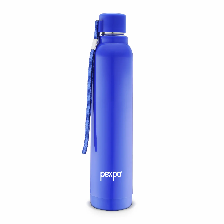

In [16]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('bottle.webp', target_size=(224, 224))
image

In [17]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [18]:

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))          


In [19]:

from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

make prediction


In [ ]:

yhat = model.predict(image)

print(yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
[[5.29076516e-09 5.79475667e-08 1.55233615e-09 1.77842840e-09
  4.93504526e-09 3.62043151e-09 5.13174059e-10 7.22283788e-09
  7.86342635e-09 9.36156610e-08 1.17797034e-08 1.62184605e-07
  3.14764179e-08 1.50203805e-09 1.10509802e-06 2.44695713e-08
  1.91662419e-08 4.28367315e-07 5.02870776e-08 2.30708430e-08
  2.79010148e-09 1.66019074e-08 3.16778026e-09 2.75041523e-09
  1.49667889e-09 1.25057742e-08 1.98480627e-08 4.65693724e-08
  7.96278243e-09 4.40318324e-08 2.29143247e-08 2.36272228e-07
  2.89629867e-07 4.23907176e-09 1.17216992e-08 1.94573668e-09
  2.00845154e-08 9.11816178e-10 5.28579225e-09 1.00758282e-08
  1.22906565e-08 9.81016779e-09 5.97230851e-08 2.88522117e-09
  1.35156941e-09 3.26554037e-08 7.16196027e-08 4.11240464e-09
  2.20578951e-08 2.37211428e-09 2.70133094e-09 4.46246401e-10
  7.98430406e-08 1.56972497e-08 1.82938589e-08 1.30081403e-08
  9.64079305e-09 4.24122293e-09 7.68645769e-09 2.96432159e-08
  1.43801460e-08 5.97474337e-09 2.

Interpret Prediction

In [ ]:

from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]


print('%s (%.2f%%)' % (label[1], label[2]*100))

water_bottle (79.32%)
